In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('uci breast cancer dataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df=df.drop(['id','Unnamed: 32'], axis='columns')

In [6]:
from sklearn.preprocessing import LabelEncoder
def encoding(df):
    le=LabelEncoder()
    for col in df.columns:
        if df[col].dtypes=='object':
            df[col]=le.fit_transform(df[col])
    return df        

In [7]:
df=encoding(df)

In [8]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

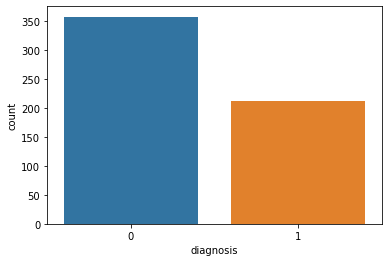

In [9]:
sns.countplot(x='diagnosis', data=df)

<AxesSubplot:>

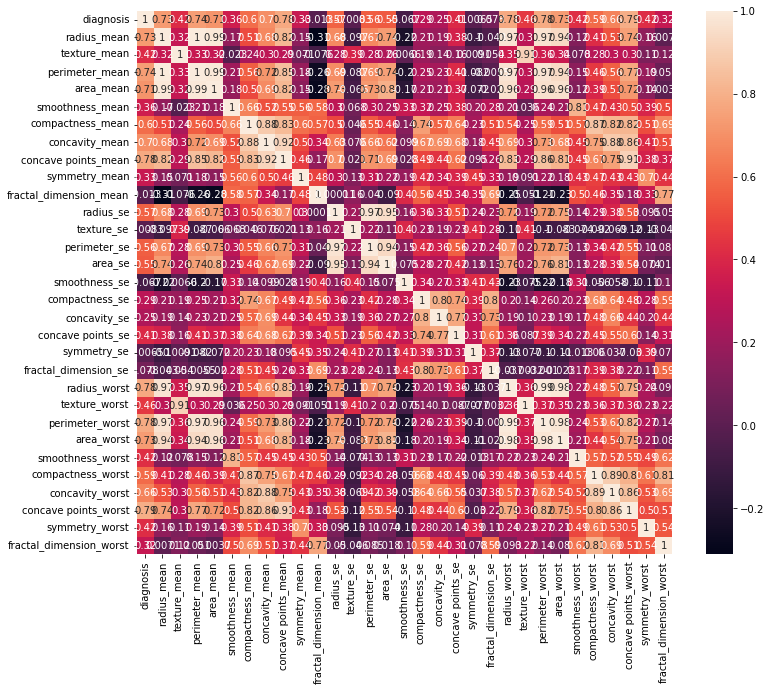

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [11]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# seperate x,y

In [12]:
x=df.drop(['diagnosis'], axis=1)
y=df['diagnosis']

# imbalance data handiling

In [13]:
from imblearn.combine import SMOTETomek

In [14]:
sm=SMOTETomek(random_state=100)

In [15]:
x,y=sm.fit_resample(x,y)

In [16]:
x.shape

(692, 30)

In [17]:
y.shape

(692,)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.75, random_state=42)

In [20]:
ytest.shape

(173,)

In [21]:
ytrain.shape

(519,)

# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf=RandomForestClassifier()

In [24]:
clf.fit(xtrain,ytrain)

RandomForestClassifier()

In [25]:
clf.score(xtest,ytest)

0.9884393063583815

In [26]:
# Randomized Search CV


In [27]:
trees=np.random.randint(15,150,30)

In [28]:
trees

array([ 56, 100, 113,  45,  44,  35,  59,  19,  63, 117, 107,  29,  92,
        54,  38, 129,  72,  29, 111, 142,  46,  94, 110,  29,  24, 139,
        74,  63,  45, 108])

In [29]:
max_features = ['sqrt','log2']
max_depth = np.random.randint(2,12,50)
criterion = ['gini','entropy']
min_samples_split = [2,3,4]

grids = {
    'n_estimators' : trees,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'criterion' : criterion,
    'min_samples_split' : min_samples_split
}

In [30]:
print(grids)

{'n_estimators': array([ 56, 100, 113,  45,  44,  35,  59,  19,  63, 117, 107,  29,  92,
        54,  38, 129,  72,  29, 111, 142,  46,  94, 110,  29,  24, 139,
        74,  63,  45, 108]), 'max_features': ['sqrt', 'log2'], 'max_depth': array([ 3,  5,  5, 10,  4,  2,  7,  8,  8,  6,  5,  6,  2,  2, 11,  9,  4,
        3,  2, 11,  8,  7, 11,  9,  4,  3,  6,  3,  2,  7, 11,  2,  8, 11,
        4,  6, 10,  4, 10,  9,  9,  9,  3,  8,  8,  3,  6,  3,  5,  6]), 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4]}


In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
rcv = RandomizedSearchCV(clf, grids, n_iter=200, cv=3)

In [33]:
rcv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  5,  5, 10,  4,  2,  7,  8,  8,  6,  5,  6,  2,  2, 11,  9,  4,
        3,  2, 11,  8,  7, 11,  9,  4,  3,  6,  3,  2,  7, 11,  2,  8, 11,
        4,  6, 10,  4, 10,  9,  9,  9,  3,  8,  8,  3,  6,  3,  5,  6]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([ 56, 100, 113,  45,  44,  35,  59,  19,  63, 117, 107,  29,  92,
        54,  38, 129,  72,  29, 111, 142,  46,  94, 110,  29,  24, 139,
        74,  63,  45, 108])})

In [34]:
rcv.cv_results_

{'mean_fit_time': array([0.20378749, 0.10905504, 0.09674486, 0.0375797 , 0.18414839,
        0.15060933, 0.11536256, 0.04421576, 0.17284886, 0.05086374,
        0.18151466, 0.08577085, 0.06083727, 0.10671488, 0.09346573,
        0.20412064, 0.17554371, 0.06549287, 0.10204991, 0.1426185 ,
        0.11203424, 0.07544231, 0.04453301, 0.08111676, 0.07347027,
        0.19914516, 0.06216884, 0.05718366, 0.09042215, 0.11902793,
        0.08876197, 0.12499881, 0.16087937, 0.05021024, 0.0279158 ,
        0.16687576, 0.23005136, 0.25299009, 0.18218247, 0.08309674,
        0.05352314, 0.11602251, 0.18949453, 0.2383635 , 0.07080189,
        0.10038551, 0.08311081, 0.10172566, 0.07081048, 0.0851059 ,
        0.04920181, 0.05585074, 0.0418876 , 0.07579756, 0.22971884,
        0.07280612, 0.03623811, 0.2078282 , 0.150611  , 0.11899471,
        0.24333779, 0.02928066, 0.14827029, 0.06215413, 0.07114315,
        0.06482649, 0.04421504, 0.06183465, 0.03058489, 0.08178155,
        0.12599635, 0.08876252,

In [35]:
tuning_result = pd.DataFrame(rcv.cv_results_)

In [36]:
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.203787,0.006924,0.015958,8.149775e-04,139,2,log2,5,gini,"{'n_estimators': 139, 'min_samples_split': 2, ...",0.965318,0.976879,0.965318,0.969171,0.005450,37
1,0.109055,0.000461,0.008310,4.711535e-04,56,4,sqrt,5,entropy,"{'n_estimators': 56, 'min_samples_split': 4, '...",0.953757,0.976879,0.976879,0.969171,0.010900,37
2,0.096745,0.003730,0.008308,4.714302e-04,63,2,log2,4,gini,"{'n_estimators': 63, 'min_samples_split': 2, '...",0.965318,0.965318,0.959538,0.963391,0.002725,113
3,0.037580,0.000477,0.003977,1.726556e-05,24,3,sqrt,2,entropy,"{'n_estimators': 24, 'min_samples_split': 3, '...",0.936416,0.947977,0.953757,0.946050,0.007209,186
4,0.184148,0.012474,0.013975,1.675653e-05,113,4,sqrt,2,entropy,"{'n_estimators': 113, 'min_samples_split': 4, ...",0.953757,0.947977,0.942197,0.947977,0.004720,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.065160,0.000940,0.005983,7.867412e-07,35,2,log2,6,entropy,"{'n_estimators': 35, 'min_samples_split': 2, '...",0.982659,0.976879,0.959538,0.973025,0.009825,14
196,0.056514,0.002352,0.005639,9.238030e-04,29,2,log2,8,entropy,"{'n_estimators': 29, 'min_samples_split': 2, '...",0.971098,0.965318,0.971098,0.969171,0.002725,37
197,0.147815,0.012335,0.010639,4.688418e-04,92,4,log2,9,entropy,"{'n_estimators': 92, 'min_samples_split': 4, '...",0.965318,0.988439,0.971098,0.974952,0.009825,4
198,0.092087,0.007344,0.007647,9.408863e-04,59,4,log2,3,entropy,"{'n_estimators': 59, 'min_samples_split': 4, '...",0.959538,0.953757,0.942197,0.951830,0.007209,174


In [37]:
rcv.best_score_

0.9845857418111753

In [38]:
rcv.best_params_

{'n_estimators': 56,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'entropy'}

# XgBoost

In [39]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [40]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [41]:
classifier=xgboost.XGBClassifier()

In [42]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [43]:
random_search.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [44]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=8, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [46]:
random_search.best_params_


{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [47]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x,y,cv=10)

In [48]:
score

array([1.        , 0.95714286, 0.95652174, 0.97101449, 0.98550725,
       1.        , 0.95652174, 1.        , 0.98550725, 1.        ])

In [49]:
score.mean()

0.9812215320910974